In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cars.csv")
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

In [5]:
df[df.duplicated()]

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen


In [6]:
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
df.columns

Index(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'price',
       'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS',
       'model', 'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [8]:
num_columns = df.select_dtypes(include=("int64")).columns
cat_columns = df.select_dtypes(include=("object")).columns

In [9]:
cat_columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'abtest', 'vehicleType',
       'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage',
       'dateCreated', 'lastSeen'],
      dtype='object')

In [10]:
df.drop(['index', 'dateCrawled', 'name', 'seller', 'offerType', 'dateCreated', 'nrOfPictures', 'postalCode',"dateCreated"
       ,'lastSeen'], inplace = True, axis = 1)

In [11]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
1,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
371524,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN


In [12]:
num_columns = df.select_dtypes(include=("int64")).columns
cat_columns = df.select_dtypes(include=("object")).columns

In [13]:
df["price"].max(), df["price"].min()

(2147483647, 0)

In [14]:
df = df[df["price"]<10000]

In [15]:
len(df)

310240

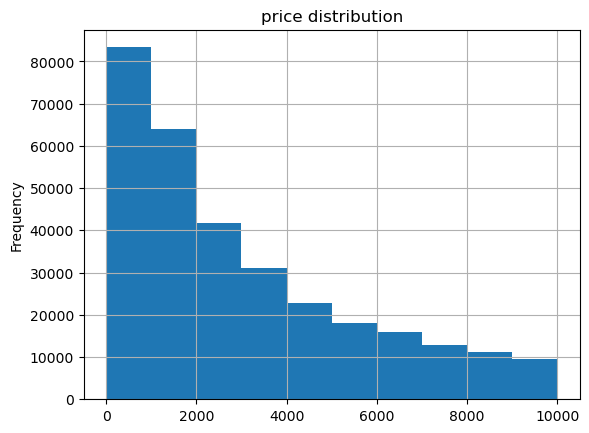

In [16]:
df["price"].plot(kind = "hist", grid = True, title = "price distribution")
plt.show()

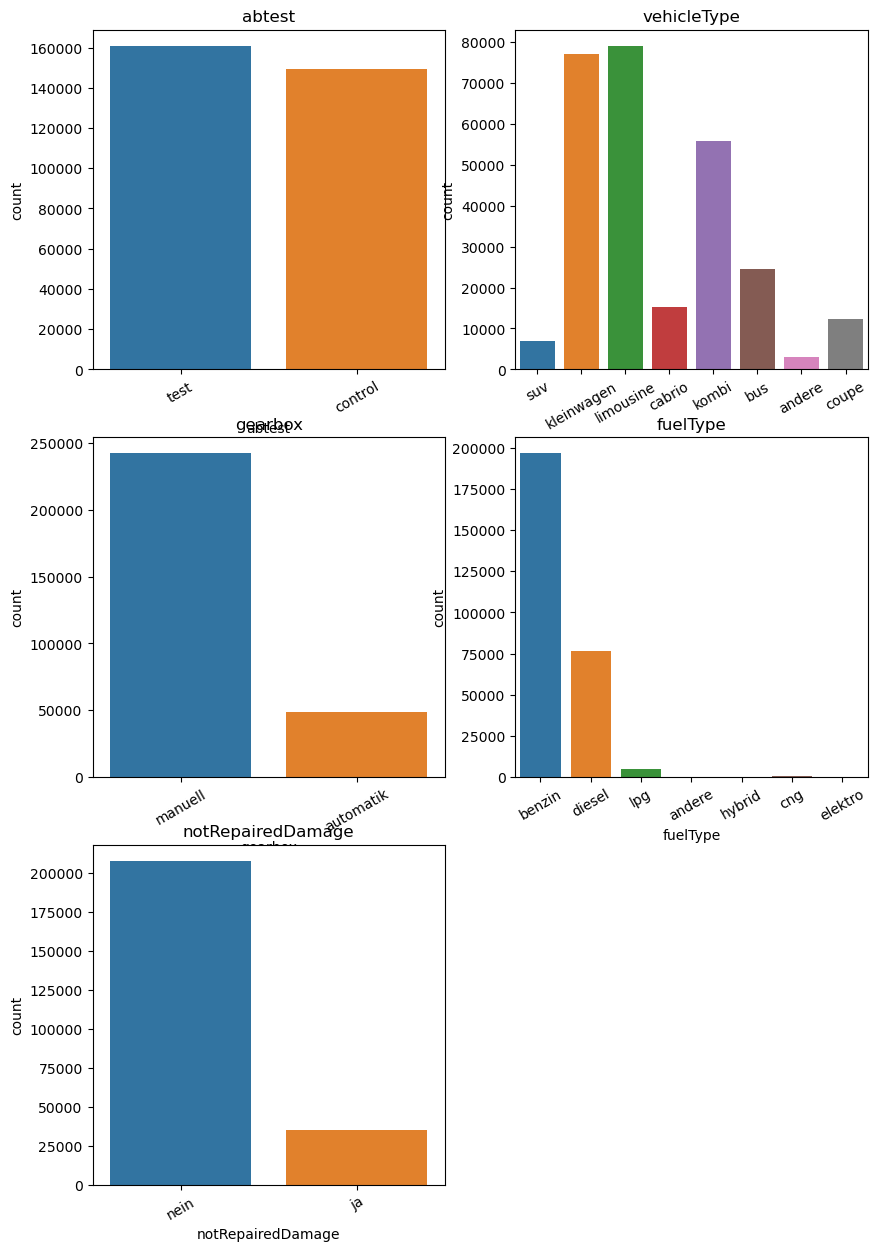

In [17]:
columns = ['abtest', 'vehicleType','gearbox', 'fuelType', 'notRepairedDamage']
plt.figure(figsize=(10,15))
count=1
for i in columns:
    plt.subplot(3,2,count)
    sns.countplot(df[i] )
    plt.title(i)
    plt.xticks(rotation=30)
    count+=1
plt.show()

In [18]:
df.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN
2,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
3,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja


In [19]:
df = df.loc[df["monthOfRegistration"]!=0].reset_index(drop = True)

In [20]:
df["notRepairedDamage"].value_counts()

nein    197767
ja       29935
Name: notRepairedDamage, dtype: int64

In [21]:
df["notRepairedDamage"] = df['notRepairedDamage'].map({"nein":0,"ja":1})

In [22]:
df


,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN
1,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,0.0
2,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,0.0
3,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,1.0
4,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273931,0,control,NaN,2005,manuell,0,colt,150000,7,benzin,mitsubishi,1.0
273932,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN
273933,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,0.0
273934,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,0.0


In [23]:
df.isnull().sum()

price                      0
abtest                     0
vehicleType            21394
yearOfRegistration         0
gearbox                 9534
powerPS                    0
model                  11909
kilometer                  0
monthOfRegistration        0
fuelType               18149
brand                      0
notRepairedDamage      46234
dtype: int64

In [24]:
df.dropna(inplace = True)

In [25]:
df

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,0.0
2,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,0.0
3,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,1.0
4,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,0.0
5,0,test,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273927,3999,test,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,0.0
273929,3200,control,limousine,2004,manuell,225,leon,150000,5,benzin,seat,1.0
273930,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,0.0
273933,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,0.0


In [26]:
num_columns = df.select_dtypes(include=("int64")).columns
cat_columns = df.select_dtypes(include=("object")).columns

In [27]:
for i in cat_columns:
    print(i, ":", len(df[i].value_counts()))

abtest : 2
vehicleType : 8
gearbox : 2
model : 246
fuelType : 7
brand : 39


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
for i in ["model","brand"]:
    df[i]  = le.fit_transform(df[i])

In [31]:
df 

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,1500,test,kleinwagen,2001,manuell,75,116,150000,6,benzin,37,0.0
2,3600,test,kleinwagen,2008,manuell,69,102,90000,7,diesel,31,0.0
3,650,test,limousine,1995,manuell,102,11,150000,10,benzin,2,1.0
4,2200,test,cabrio,2004,manuell,109,8,150000,8,benzin,25,0.0
5,0,test,limousine,1980,manuell,50,40,40000,7,benzin,37,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
273927,3999,test,kombi,2005,manuell,3,11,150000,5,diesel,2,0.0
273929,3200,control,limousine,2004,manuell,225,140,150000,5,benzin,30,1.0
273930,1150,control,bus,2000,manuell,0,245,150000,3,benzin,24,0.0
273933,1199,test,cabrio,2000,automatik,101,107,125000,3,benzin,32,0.0


In [32]:
df.to_csv("cars_data.csv", index = False)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.corr()["price"]

In [368]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [369]:
traindf, testdf = train_test_split(df, test_size=0.25, random_state=45)

In [376]:
x_train = traindf.drop("price", axis = 1)
y_train = traindf["price"]
x_test = testdf.drop("price", axis = 1)
y_test = testdf["price"]

In [377]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((150273, 22), (150273,), (50091, 22), (50091,))

In [378]:
x_train

,yearOfRegistration,powerPS,model,kilometer,monthOfRegistration,brand,notRepairedDamage,abtest_test,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
219805,2004,86,218,150000,8,37,0.0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0
143133,2009,60,172,80000,3,37,0.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
87191,2003,83,123,150000,1,11,0.0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
207556,1999,50,172,60000,4,37,0.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
237403,2012,95,103,80000,5,10,0.0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196900,1998,114,83,150000,6,35,1.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
83139,2006,90,84,150000,4,24,0.0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
187527,2000,0,3,150000,3,0,0.0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0
265524,1998,0,29,150000,11,1,0.0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [379]:
from sklearn.ensemble import RandomForestRegressor
Reg = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

In [380]:
Reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [381]:
y_pre = Reg.predict(x_test)

In [382]:
y_pre

array([2691.245     , 8219.07916667, 1490.375     , ..., 2710.43333333,
       5543.45833333, 3813.69416667])

In [383]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.8131397746722293